In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import torch
import torch.nn as nn
from torch.distributions import Normal
from torch.distributions.kl import kl_divergence
import sys
sys.path.append('..')

import logging
from src.utils import setup_logging
setup_logging(console=True, file=False, debug=True)

[DEBUG]: Logging setup done ....  ([2024-07-18 16:58:28] utils.py:60)


['The night will start off chilly with temperatures slowly dropping to 2.0°C around dawn, then gradually warming up throughout the morning to reach a mild high of 8.0°C in the late afternoon before cooling down again in the evening.'
 "It's going to be a chilly night with temperatures dipping as low as -3.6°C in the early morning hours, but you can expect a gradual warming up as we approach the afternoon with a high of 5.2°C. The temperature will then cool off again as we move into the evening, reaching -1.0°C by midnight."
 'The night will start off very chilly at -11.6°C and will gradually warm up to -3.2°C by midnight. The coldest part of the day will be the early morning, while the temperature will slightly improve during the afternoon and evening.'
 'The night will be bitterly cold with temperatures falling to -15.1°C, gradually rising to -8.2°C by late evening. The afternoon will see a slight respite with temperatures around -10.3°C.'
 "The night will start off chilly with temper

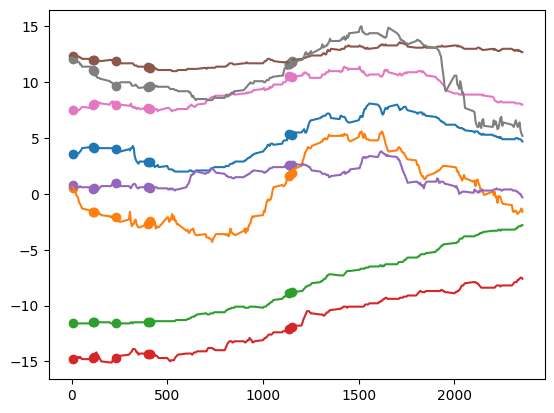

In [2]:
import pandas as pd
from data.tempdata import TempData
import matplotlib.pyplot as plt
# Load the data
data_path = '../data/data_with_desc.csv'
data = pd.read_csv(data_path, header=None)
data_test = TempData(data=data, max_num_context=10, device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu"))

batch, knowledge = data_test.generate_batch(batch_size=8, return_knowledge=True)

print(knowledge)
for i in range(8):
    x_target = batch.x_target[i].flatten()
    y_target = batch.y_target[i].flatten()
    plt.plot(x_target.numpy(), y_target.numpy())
for i in range(8):
    x_context = batch.x_context[i].flatten()
    y_context = batch.y_context[i].flatten()
    plt.scatter(x_context.numpy(), y_context.numpy())
plt.show()

In [17]:
def calculate_loss(
                      pred_dist: Normal, 
                      y_target: torch.Tensor,
                      posterior: Normal,
                      prior: Normal
                      ):

    batch_size, num_targets, _ = y_target.shape
    # print(pred_dist.batch_shape, pred_dist.event_shape)
    log_lik = pred_dist.log_prob(y_target).sum(0) # Shape (batch_size, num_targets)
    # print(log_lik.shape)
    # assert log_p.shape[-1] == 1
    # log_p = log_p.squeeze(-1)

    kl_div = torch.sum(kl_divergence(posterior, prior), dim=-1, keepdim=True) # Shape (batch_size, 1)
    # print(kl_div.shape)
    loss = -torch.mean(log_lik - kl_div / num_targets)
    return loss, log_lik

[WARNING]: Hidden activation set but no hidden layers  ([2024-07-18 18:50:33] mlp.py:22)
[WARNING]: Hidden activation set but no hidden layers  ([2024-07-18 18:50:33] mlp.py:22)
[DEBUG]: XYEncoder has x_dim=1 and y_dim=1  ([2024-07-18 18:50:33] xy_encoders.py:57)


InformedNeuralProcess(
  (x_context_encoder): XEncoder(
    (mlp): MLP(
      (mlp): Sequential(
        (0): Linear(in_features=1, out_features=1, bias=True)
      )
    )
  )
  (x_target_encoder): XEncoder(
    (mlp): MLP(
      (mlp): Sequential(
        (0): Linear(in_features=1, out_features=128, bias=True)
      )
    )
  )
  (xy_encoder_latent): XYSetEncoder(
    (phi): MLP(
      (mlp): Sequential(
        (0): Linear(in_features=2, out_features=128, bias=True)
        (1): ReLU()
        (2): Linear(in_features=128, out_features=128, bias=True)
        (3): ReLU()
        (4): Linear(in_features=128, out_features=128, bias=True)
      )
    )
    (self_attention_block): MultiheadAttention(
      (qkv_proj): Linear(in_features=128, out_features=384, bias=True)
      (o_proj): Linear(in_features=128, out_features=128, bias=True)
    )
  )
  (latent_encoder): RhoLatentEncoder(
    (rho): MLP(
      (mlp): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=Tru

  0%|          | 0/100001 [00:00<?, ?it/s]

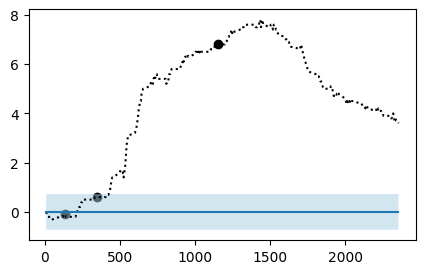

  1%|          | 1017/100001 [00:14<20:04, 82.20it/s]

iter 1001: Avg. Loss = 80884.31084765625
iter 1001: Avg. Loss = 4.436802644729614


  2%|▏         | 1993/100001 [00:24<18:24, 88.71it/s] 

iter 2001: Avg. Loss = 62278.52339453125
iter 2001: Avg. Loss = 3.4139518802165987


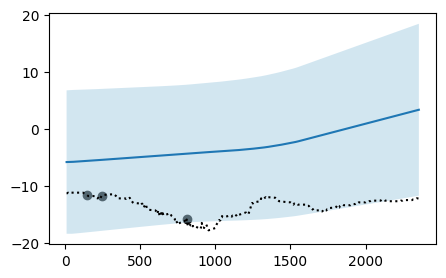

  3%|▎         | 3009/100001 [00:36<20:01, 80.75it/s]

iter 3001: Avg. Loss = 50802.70480078125
iter 3001: Avg. Loss = 2.810273722887039


  4%|▍         | 3995/100001 [00:50<24:31, 65.26it/s]

iter 4001: Avg. Loss = 43000.45344140625
iter 4001: Avg. Loss = 2.3808620504140854


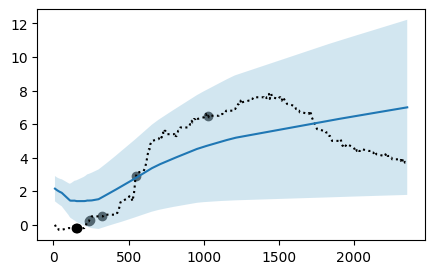

  5%|▌         | 5014/100001 [01:06<24:04, 65.78it/s]

iter 5001: Avg. Loss = 36324.359666015625
iter 5001: Avg. Loss = 2.0546992087364195


  6%|▌         | 5999/100001 [01:21<23:28, 66.76it/s]

iter 6001: Avg. Loss = 30068.179990234374
iter 6001: Avg. Loss = 1.7368028988838196


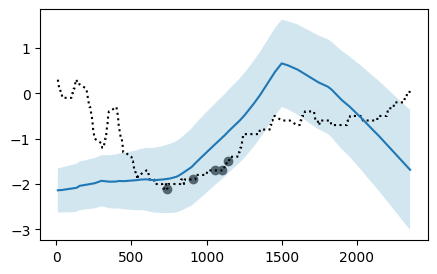

  7%|▋         | 7010/100001 [01:36<23:28, 66.03it/s]

iter 7001: Avg. Loss = 27116.501408203127
iter 7001: Avg. Loss = 1.5723146089315414


  8%|▊         | 7994/100001 [01:51<23:28, 65.34it/s]

iter 8001: Avg. Loss = 25009.7679140625
iter 8001: Avg. Loss = 1.4608758745193482


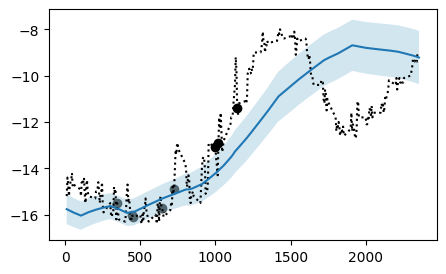

  9%|▉         | 9008/100001 [02:07<22:35, 67.14it/s]

iter 9001: Avg. Loss = 23810.23935546875
iter 9001: Avg. Loss = 1.4031642701625824


 10%|▉         | 9995/100001 [02:21<22:09, 67.70it/s]

iter 10001: Avg. Loss = 24411.471224609377
iter 10001: Avg. Loss = 1.4358605171442032


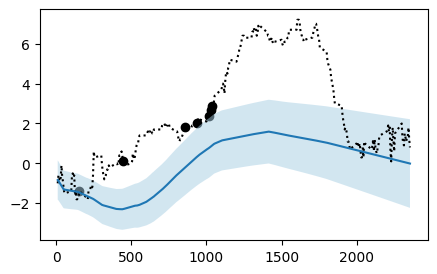

 11%|█         | 11008/100001 [02:37<22:56, 64.67it/s]

iter 11001: Avg. Loss = 24744.7294453125
iter 11001: Avg. Loss = 1.4530801030397416


 12%|█▏        | 11995/100001 [02:52<22:28, 65.28it/s]

iter 12001: Avg. Loss = 22068.935701171875
iter 12001: Avg. Loss = 1.3084403462409973


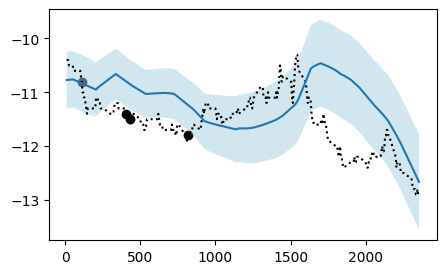

 13%|█▎        | 13011/100001 [03:07<22:32, 64.32it/s]

iter 13001: Avg. Loss = 20669.291229492188
iter 13001: Avg. Loss = 1.2357676165699958


 14%|█▍        | 13999/100001 [03:23<22:12, 64.52it/s]

iter 14001: Avg. Loss = 20957.310114257813
iter 14001: Avg. Loss = 1.2498245928883553


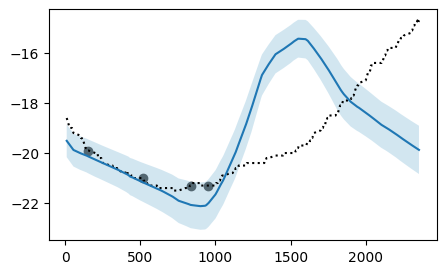

 15%|█▌        | 15007/100001 [03:38<22:00, 64.37it/s]

iter 15001: Avg. Loss = 19181.521140625
iter 15001: Avg. Loss = 1.1584629434347153


 16%|█▌        | 15998/100001 [03:53<21:18, 65.69it/s]

iter 16001: Avg. Loss = 18230.564086914062
iter 16001: Avg. Loss = 1.1099009695053101


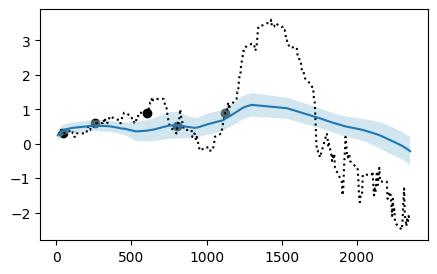

 17%|█▋        | 16542/100001 [04:01<20:19, 68.42it/s]


KeyboardInterrupt: 

In [25]:
from src.plot import plot_predictive
from src.informed_np import InformedNeuralProcess
from tqdm import tqdm
from src.loss import ELBOLoss

x_dim = 1
y_dim = 1
determ_dim = 128  # Dimension of representation of context points
latent_dim = 128  # Dimension of sampled latent variable
hidden_dim = 128  # Dimension of hidden layers in encoder and decoder

model = InformedNeuralProcess(
    x_dim=x_dim,
    y_dim=y_dim,
    hidden_dim=hidden_dim,
    latent_dim=latent_dim,
    determ_dim=determ_dim,
    knowledge_dim=128,
    mlps_activation=nn.ReLU(),
    x_proj_dim=1,
    n_h_layers_x_proj=0,
    n_h_layers_decoder=4,
    n_h_layers_latent_xy_encoder=2,
    n_h_layers_film_latent_encoder=2,
    path='latent',
    train_num_z_samples=1,
    test_num_z_samples=1,
    use_bias=True,
    user_context_in_target=True, # TODO investigate
    use_latent_self_attn=True,
    # use_determ_self_attn=True,
    # use_determ_cross_attn=True,
    use_knowledge=False,
    knowledge_dropout=0.3,
    roberta_return_cls=True,
    tune_llm_layer_norms=False,
    freeze_llm=True,
    knowledge_projection_n_h_layers=0,
    knowledge_aggregation_method='FiLM+MLP',
    device='cuda',
    beta=1.0
)
print(model)
print(sum(p.numel() for p in model.parameters() if p.requires_grad))

#data = SineData(max_num_context=30, random_kernel_parameters=True)
optimiser = torch.optim.Adam(model.parameters(), lr=1e-3)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device {device}")
model.to(device)

loss_function = ELBOLoss(beta=25)

data_path = '../data/data.csv'
data = pd.read_csv(data_path, header=None)
data = TempData(data=data , max_num_context=10, device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu"))
train_losses = []
old_losses = []
for iter in tqdm(range(100000+1)):
    model.training = True
    optimiser.zero_grad()

    batch = data.generate_batch(batch_size=64, device=device)
    p_y_pred, q_z_context, q_z_target = model(batch.x_context, batch.y_context, batch.x_target, None, batch.y_target)

    loss_dict = loss_function(p_y_pred, q_z_context, q_z_target, batch.y_target)

    old_loss, _ = calculate_loss(p_y_pred, batch.y_target, q_z_target, q_z_context)
    old_losses.append(old_loss.item())
    
    train_loss = loss_dict['loss']
    train_loss.backward()
    optimiser.step() 

    train_losses.append(train_loss.item())

    if iter % 1000 == 0 and iter > 0:
        print(f"iter {iter+1}: Avg. Loss = {sum(train_losses[-1000:])/1000}")
        print(f"iter {iter+1}: Avg. Loss = {sum(old_losses[-1000:])/1000}")

        with torch.no_grad():
            val_loss = 0
            n_val_batches = 32
            val_batch_size = 64
            for _ in range(n_val_batches):
                batch = data.generate_batch(batch_size=val_batch_size, training=False, device=model.device)
                p_y_pred, _loss, log_lik = model(batch.x_context, batch.y_context, batch.x_target, None, batch.y_target)
                val_loss += _loss
            print(f"Val Loss: {val_loss / n_val_batches}")
       
    if iter % 2000 == 0:
        model.training = False
        batch = data.generate_batch(batch_size=1, training=False, device=model.device)
        plot_predictive(model, batch, knowledge=None, save=False, iter=None)
        model.training = True

# plt.plot(train_loss, label='train_loss')
# window = 50
# plt.plot([sum(train_loss[i:i+window])/window for i in range(len(train_loss)-window)], label=f'train_loss_{window}_smooth')
# plt.legend()
# plt.show()

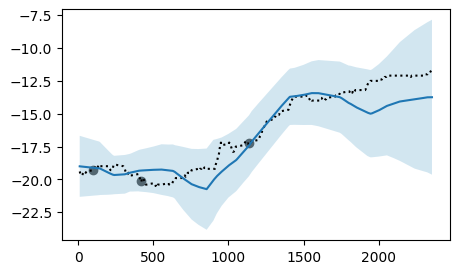

In [67]:
model.training = False
batch = data.generate_batch(batch_size=1, device=model.device)
plot_predictive(model, batch, knowledge=None, save=False, iter=None)
model.training = True


In [5]:
import transformers
from transformers import RobertaModel, RobertaTokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base', truncation=True, do_lower_case=True)
langmodel = RobertaModel.from_pretrained("roberta-base")
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
langmodel.to(device)
# freeze everything
for name, param in langmodel.named_parameters():
    if "LayerNorm" in name or name == 'pooler.dense.bias' or name == 'pooler.dense.weight':
        param.requires_grad = True
    else:
        param.requires_grad = False

#verify
for name, param in langmodel.named_parameters():
    print(name,param.requires_grad)

/home/w/IML/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


embeddings.word_embeddings.weight False
embeddings.position_embeddings.weight False
embeddings.token_type_embeddings.weight False
embeddings.LayerNorm.weight True
embeddings.LayerNorm.bias True
encoder.layer.0.attention.self.query.weight False
encoder.layer.0.attention.self.query.bias False
encoder.layer.0.attention.self.key.weight False
encoder.layer.0.attention.self.key.bias False
encoder.layer.0.attention.self.value.weight False
encoder.layer.0.attention.self.value.bias False
encoder.layer.0.attention.output.dense.weight False
encoder.layer.0.attention.output.dense.bias False
encoder.layer.0.attention.output.LayerNorm.weight True
encoder.layer.0.attention.output.LayerNorm.bias True
encoder.layer.0.intermediate.dense.weight False
encoder.layer.0.intermediate.dense.bias False
encoder.layer.0.output.dense.weight False
encoder.layer.0.output.dense.bias False
encoder.layer.0.output.LayerNorm.weight True
encoder.layer.0.output.LayerNorm.bias True
encoder.layer.1.attention.self.query.weigh

NeuralProcess(
  (deterministic_encoder): DeterminisitcEncoder(
    (phi): BatchMLP(
      (mlp): Sequential(
        (0): Linear(in_features=2, out_features=128, bias=True)
        (1): GELU(approximate='none')
        (2): Linear(in_features=128, out_features=128, bias=True)
        (3): GELU(approximate='none')
        (4): Linear(in_features=128, out_features=128, bias=True)
        (5): GELU(approximate='none')
        (6): Linear(in_features=128, out_features=128, bias=True)
        (7): GELU(approximate='none')
        (8): Linear(in_features=128, out_features=128, bias=True)
        (9): GELU(approximate='none')
        (10): Linear(in_features=128, out_features=128, bias=True)
        (11): Identity()
      )
    )
    (rho): Linear(in_features=128, out_features=128, bias=True)
    (cross_attention_block): CrossAttention(
      (q_proj): Linear(in_features=128, out_features=128, bias=True)
      (k_proj): Linear(in_features=128, out_features=128, bias=True)
      (v_proj): Lin

  0%|          | 0/100001 [00:00<?, ?it/s]

iter 1: Avg. Loss SLOW = 23.9564296875
Val Loss: 16363.0146484375


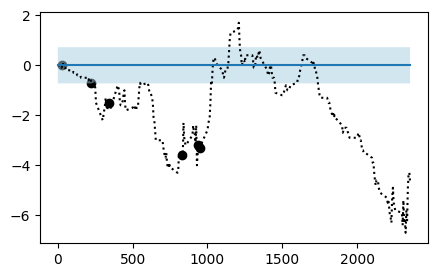

  1%|          | 984/100001 [02:21<3:51:53,  7.12it/s]

iter 1001: Avg. Loss = 1371.3650053710937


  2%|▏         | 1979/100001 [04:42<3:49:56,  7.10it/s]

iter 2001: Avg. Loss = 825.6592733154297


  3%|▎         | 2987/100001 [07:03<3:45:45,  7.16it/s]

iter 3001: Avg. Loss = 609.216155670166


  4%|▍         | 3995/100001 [09:24<3:43:55,  7.15it/s]

iter 4001: Avg. Loss = 572.6883545837402


  5%|▌         | 5002/100001 [11:45<3:42:38,  7.11it/s]

iter 5001: Avg. Loss = 559.4265250244141


  6%|▌         | 5938/100001 [13:57<3:40:23,  7.11it/s]

iter 6001: Avg. Loss = 548.3296486206054


  7%|▋         | 6948/100001 [16:18<3:37:01,  7.15it/s]

iter 7001: Avg. Loss = 549.4437937316894


  8%|▊         | 7956/100001 [18:40<3:34:40,  7.15it/s]

iter 8001: Avg. Loss = 547.3991734008789


  9%|▉         | 8964/100001 [21:01<3:33:03,  7.12it/s]

iter 9001: Avg. Loss = 538.3132267150879


 10%|▉         | 9972/100001 [23:22<3:29:51,  7.15it/s]

iter 10001: Avg. Loss = 542.1308537597656
iter 10001: Avg. Loss SLOW = 6640.015580505371
Val Loss: 539.7378540039062


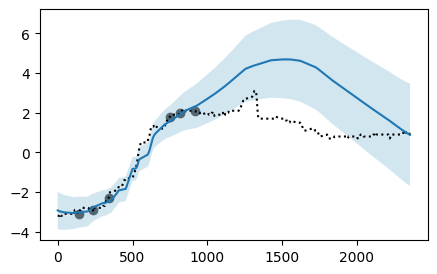

 11%|█         | 10979/100001 [25:46<3:29:05,  7.10it/s]

iter 11001: Avg. Loss = 543.0914686279297


 12%|█▏        | 11988/100001 [28:08<3:24:44,  7.16it/s]

iter 12001: Avg. Loss = 532.3450851135254


 13%|█▎        | 12999/100001 [30:29<3:23:06,  7.14it/s]

iter 13001: Avg. Loss = 534.1593942871094


 14%|█▍        | 13935/100001 [32:40<3:21:00,  7.14it/s]

iter 14001: Avg. Loss = 525.9138946838378


 15%|█▍        | 14943/100001 [35:01<3:18:32,  7.14it/s]

iter 15001: Avg. Loss = 528.0674024963379


 16%|█▌        | 15947/100001 [37:23<3:18:53,  7.04it/s]

iter 16001: Avg. Loss = 528.7950945739747


 17%|█▋        | 16968/100001 [39:45<3:12:22,  7.19it/s]

iter 17001: Avg. Loss = 528.6839168395996


 18%|█▊        | 17985/100001 [42:06<3:11:05,  7.15it/s]

iter 18001: Avg. Loss = 530.6639389648437


 19%|█▉        | 18933/100001 [44:18<3:07:13,  7.22it/s]

iter 19001: Avg. Loss = 526.5544255371094


 20%|█▉        | 19955/100001 [46:40<3:04:59,  7.21it/s]

iter 20001: Avg. Loss = 523.6991371459961
iter 20001: Avg. Loss SLOW = 5301.973758270264
Val Loss: 532.4949951171875


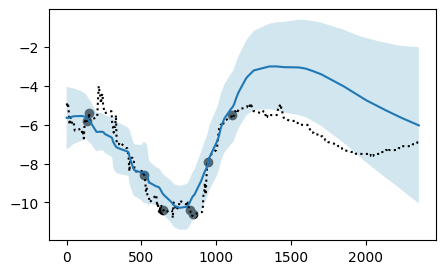

 21%|██        | 20974/100001 [49:03<3:02:10,  7.23it/s]

iter 21001: Avg. Loss = 515.9198327026368


 22%|██▏       | 21996/100001 [51:24<2:59:39,  7.24it/s]

iter 22001: Avg. Loss = 525.856572845459


 23%|██▎       | 22945/100001 [53:36<2:57:50,  7.22it/s]

iter 23001: Avg. Loss = 515.4177964172363


 24%|██▍       | 23966/100001 [55:57<2:55:40,  7.21it/s]

iter 24001: Avg. Loss = 510.3230696411133


 25%|██▍       | 24988/100001 [58:18<2:52:50,  7.23it/s]

iter 25001: Avg. Loss = 510.39477786254884


 26%|██▌       | 25937/100001 [1:00:30<2:51:02,  7.22it/s]

iter 26001: Avg. Loss = 508.5371583251953


 27%|██▋       | 26958/100001 [1:02:51<2:48:29,  7.23it/s]

iter 27001: Avg. Loss = 503.0642421264648


 29%|██▉       | 28997/100001 [1:07:34<2:43:36,  7.23it/s]

iter 29001: Avg. Loss = 499.06072512817383


 30%|██▉       | 29946/100001 [1:09:45<2:41:27,  7.23it/s]

iter 30001: Avg. Loss = 500.54304544067384
iter 30001: Avg. Loss SLOW = 5087.755708679199
Val Loss: 526.810791015625


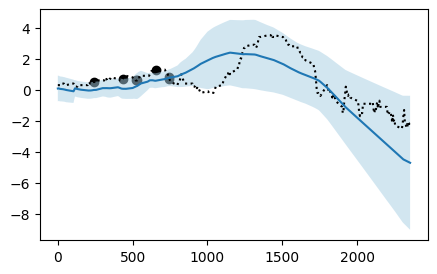

 31%|███       | 30966/100001 [1:12:09<2:39:44,  7.20it/s]

iter 31001: Avg. Loss = 512.9031107788086


 32%|███▏      | 31986/100001 [1:14:31<2:37:06,  7.22it/s]

iter 32001: Avg. Loss = 501.54896551513673


 33%|███▎      | 32932/100001 [1:16:42<2:35:23,  7.19it/s]

iter 33001: Avg. Loss = 499.6855223693848


 34%|███▍      | 33952/100001 [1:19:04<2:32:47,  7.20it/s]

iter 34001: Avg. Loss = 497.04228982543947


 35%|███▍      | 34974/100001 [1:21:26<2:30:07,  7.22it/s]

iter 35001: Avg. Loss = 495.59085443115237


 36%|███▌      | 35995/100001 [1:23:47<2:27:50,  7.22it/s]

iter 36001: Avg. Loss = 487.19154080200195


 37%|███▋      | 36943/100001 [1:25:59<2:25:39,  7.22it/s]

iter 37001: Avg. Loss = 487.8066882629395


 38%|███▊      | 37955/100001 [1:28:20<2:24:34,  7.15it/s]

iter 38001: Avg. Loss = 492.50317535400393


 39%|███▉      | 38977/100001 [1:30:42<2:21:03,  7.21it/s]

iter 39001: Avg. Loss = 491.9586025085449


 40%|███▉      | 39997/100001 [1:33:03<2:18:45,  7.21it/s]

iter 40001: Avg. Loss = 485.4801080932617
iter 40001: Avg. Loss SLOW = 4951.710857940674
Val Loss: 550.7266845703125


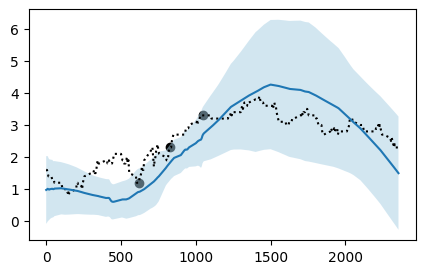

 41%|████      | 40946/100001 [1:35:17<2:16:15,  7.22it/s]

iter 41001: Avg. Loss = 481.238854888916


 42%|████▏     | 41968/100001 [1:37:39<2:13:49,  7.23it/s]

iter 42001: Avg. Loss = 481.3686446533203


 43%|████▎     | 42990/100001 [1:40:00<2:11:20,  7.23it/s]

iter 43001: Avg. Loss = 481.2689278564453


 44%|████▍     | 43939/100001 [1:42:11<2:09:09,  7.23it/s]

iter 44001: Avg. Loss = 476.26943173217774


 45%|████▍     | 44959/100001 [1:44:32<2:06:42,  7.24it/s]

iter 45001: Avg. Loss = 478.30228985595704


 46%|████▌     | 45980/100001 [1:46:54<2:04:31,  7.23it/s]

iter 46001: Avg. Loss = 485.5301823730469


 47%|████▋     | 47002/100001 [1:49:15<2:02:14,  7.23it/s]

iter 47001: Avg. Loss = 485.8365174560547


 48%|████▊     | 47951/100001 [1:51:26<1:59:53,  7.24it/s]

iter 48001: Avg. Loss = 548.2967840576172


 49%|████▉     | 48973/100001 [1:53:48<1:58:09,  7.20it/s]

iter 49001: Avg. Loss = 557.021600769043


 50%|████▉     | 49992/100001 [1:56:09<1:55:37,  7.21it/s]

iter 50001: Avg. Loss = 558.165262512207
iter 50001: Avg. Loss SLOW = 5033.298496154785
Val Loss: 583.62353515625


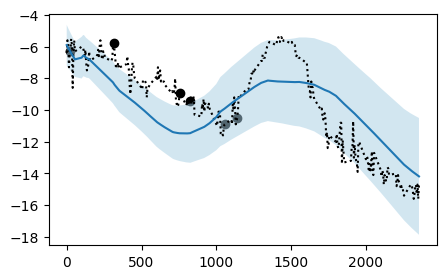

 51%|█████     | 50941/100001 [1:58:24<1:53:25,  7.21it/s]

iter 51001: Avg. Loss = 513.3809118041992


 52%|█████▏    | 51958/100001 [2:00:45<1:51:20,  7.19it/s]

iter 52001: Avg. Loss = 504.6460089416504


 53%|█████▎    | 52977/100001 [2:03:06<1:48:41,  7.21it/s]

iter 53001: Avg. Loss = 491.550724029541


 54%|█████▍    | 53995/100001 [2:05:28<1:46:41,  7.19it/s]

iter 54001: Avg. Loss = 494.000272857666


 55%|█████▍    | 54934/100001 [2:07:38<1:44:28,  7.19it/s]

iter 55001: Avg. Loss = 487.53985223388673


 56%|█████▌    | 55942/100001 [2:10:00<1:43:47,  7.07it/s]

iter 56001: Avg. Loss = 486.95400485229493


 57%|█████▋    | 56949/100001 [2:12:21<1:40:20,  7.15it/s]

iter 57001: Avg. Loss = 482.0995071716309


 58%|█████▊    | 57962/100001 [2:14:42<1:38:10,  7.14it/s]

iter 58001: Avg. Loss = 483.27919619750975


 59%|█████▉    | 58970/100001 [2:17:03<1:35:35,  7.15it/s]

iter 59001: Avg. Loss = 484.91028677368166


 60%|█████▉    | 59980/100001 [2:19:24<1:33:12,  7.16it/s]

iter 60001: Avg. Loss = 483.7532645874023
iter 60001: Avg. Loss SLOW = 4912.114029449463
Val Loss: 607.7719116210938


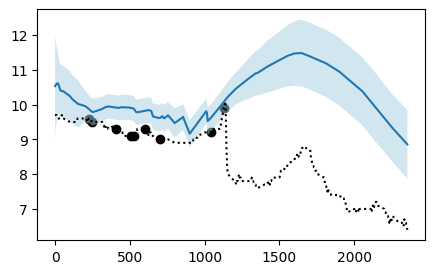

 61%|██████    | 60993/100001 [2:21:48<1:30:35,  7.18it/s]

iter 61001: Avg. Loss = 482.2519457092285


 62%|██████▏   | 61931/100001 [2:23:59<1:28:39,  7.16it/s]

iter 62001: Avg. Loss = 479.22636532592776


 63%|██████▎   | 62949/100001 [2:26:21<1:25:43,  7.20it/s]

iter 63001: Avg. Loss = 483.8192778015137


 64%|██████▍   | 63964/100001 [2:28:42<1:23:36,  7.18it/s]

iter 64001: Avg. Loss = 474.9933201599121


 65%|██████▍   | 64970/100001 [2:31:03<1:23:22,  7.00it/s]

iter 65001: Avg. Loss = 477.8750107421875


 66%|██████▌   | 65982/100001 [2:33:25<1:19:08,  7.16it/s]

iter 66001: Avg. Loss = 473.89068518066404


 67%|██████▋   | 67000/100001 [2:35:46<1:16:32,  7.19it/s]

iter 67001: Avg. Loss = 475.0987686767578


 68%|██████▊   | 67945/100001 [2:37:57<1:13:58,  7.22it/s]

iter 68001: Avg. Loss = 472.8535310668945


 69%|██████▉   | 68966/100001 [2:40:19<1:11:41,  7.21it/s]

iter 69001: Avg. Loss = 467.91316943359374


 70%|██████▉   | 69988/100001 [2:42:41<1:09:27,  7.20it/s]

iter 70001: Avg. Loss = 470.51551168823244
iter 70001: Avg. Loss SLOW = 4758.437585784912
Val Loss: 540.6129150390625


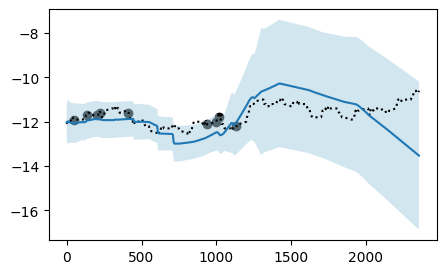

 71%|███████   | 71002/100001 [2:45:04<1:07:00,  7.21it/s]

iter 71001: Avg. Loss = 470.40968722534177


 72%|███████▏  | 71950/100001 [2:47:15<1:04:58,  7.20it/s]

iter 72001: Avg. Loss = 473.87423455810546


 73%|███████▎  | 72960/100001 [2:49:36<1:02:57,  7.16it/s]

iter 73001: Avg. Loss = 470.0021811523437


 74%|███████▍  | 73971/100001 [2:51:57<1:00:18,  7.19it/s]

iter 74001: Avg. Loss = 466.7216307373047


 75%|███████▍  | 74984/100001 [2:54:18<57:58,  7.19it/s]  

iter 75001: Avg. Loss = 468.0330242614746


 76%|███████▌  | 75999/100001 [2:56:39<55:33,  7.20it/s]

iter 76001: Avg. Loss = 473.33743280029296


 77%|███████▋  | 76942/100001 [2:58:50<53:39,  7.16it/s]

iter 77001: Avg. Loss = 470.5101130065918


 78%|███████▊  | 77952/100001 [3:01:11<51:10,  7.18it/s]

iter 78001: Avg. Loss = 468.7044523925781


 79%|███████▉  | 78965/100001 [3:03:32<48:48,  7.18it/s]

iter 79001: Avg. Loss = 461.74700442504883


 80%|███████▉  | 79973/100001 [3:05:53<46:46,  7.14it/s]

iter 80001: Avg. Loss = 468.2334920043945
iter 80001: Avg. Loss SLOW = 4691.573252563477
Val Loss: 536.5985717773438


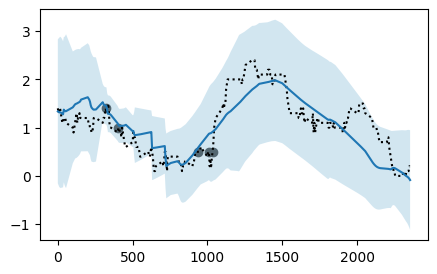

 81%|████████  | 80991/100001 [3:08:17<44:02,  7.19it/s]

iter 81001: Avg. Loss = 469.763079498291


 82%|████████▏ | 81939/100001 [3:10:29<41:46,  7.21it/s]

iter 82001: Avg. Loss = 468.07367901611326


 83%|████████▎ | 82952/100001 [3:12:50<39:41,  7.16it/s]

iter 83001: Avg. Loss = 460.41709146118166


 84%|████████▍ | 83965/100001 [3:15:11<37:15,  7.17it/s]

iter 84001: Avg. Loss = 461.5391283569336


 85%|████████▍ | 84979/100001 [3:17:33<34:45,  7.20it/s]

iter 85001: Avg. Loss = 463.2252283935547


 86%|████████▌ | 86000/100001 [3:19:54<32:31,  7.18it/s]

iter 86001: Avg. Loss = 459.400683013916


 87%|████████▋ | 86947/100001 [3:22:05<30:05,  7.23it/s]

iter 87001: Avg. Loss = 458.2623641052246


 88%|████████▊ | 87968/100001 [3:24:27<27:50,  7.20it/s]

iter 88001: Avg. Loss = 458.81936056518555


 89%|████████▉ | 88990/100001 [3:26:49<25:25,  7.22it/s]

iter 89001: Avg. Loss = 454.3959769592285


 90%|████████▉ | 89939/100001 [3:29:00<23:13,  7.22it/s]

iter 90001: Avg. Loss = 459.143133605957
iter 90001: Avg. Loss SLOW = 4613.039724975586
Val Loss: 576.7901000976562


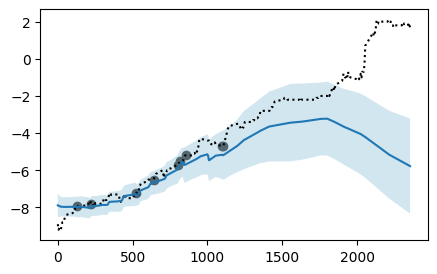

 91%|█████████ | 90956/100001 [3:31:24<20:56,  7.20it/s]

iter 91001: Avg. Loss = 465.2961449584961


 92%|█████████▏| 91971/100001 [3:33:45<18:33,  7.21it/s]

iter 92001: Avg. Loss = 461.93221728515624


 93%|█████████▎| 92991/100001 [3:36:06<16:13,  7.20it/s]

iter 93001: Avg. Loss = 458.30853015136717


 94%|█████████▍| 93931/100001 [3:38:17<14:06,  7.17it/s]

iter 94001: Avg. Loss = 460.73588708496095


 95%|█████████▍| 94944/100001 [3:40:38<11:43,  7.19it/s]

iter 95001: Avg. Loss = 454.50996127319337


 96%|█████████▌| 95959/100001 [3:43:00<09:23,  7.18it/s]

iter 96001: Avg. Loss = 448.89369677734373


 97%|█████████▋| 96979/100001 [3:45:21<06:59,  7.21it/s]

iter 97001: Avg. Loss = 458.3916351623535


 98%|█████████▊| 97993/100001 [3:47:42<04:39,  7.19it/s]

iter 98001: Avg. Loss = 457.97456723022464


 99%|█████████▉| 98934/100001 [3:49:53<02:28,  7.18it/s]

iter 99001: Avg. Loss = 457.12769848632814


100%|█████████▉| 99956/100001 [3:52:15<00:06,  7.21it/s]

iter 100001: Avg. Loss = 475.8789781188965
iter 100001: Avg. Loss SLOW = 4599.049316528321
Val Loss: 606.09228515625


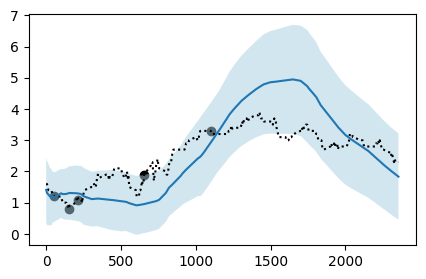

100%|██████████| 100001/100001 [3:52:24<00:00,  7.17it/s]


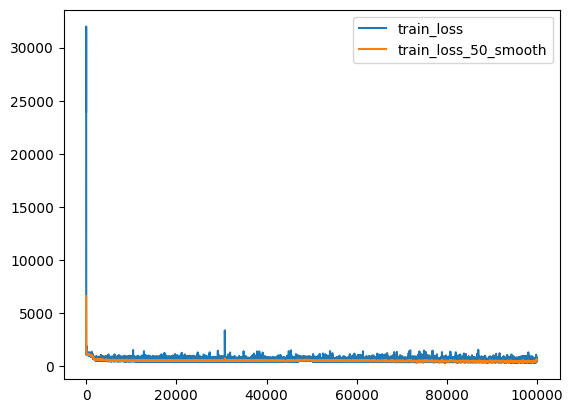

In [66]:
from src.plot import plot_predictive
from src.np import NeuralProcess

x_dim = 1
y_dim = 1
determ_dim = 128  # Dimension of representation of context points
latent_dim = 128  # Dimension of sampled latent variable
hidden_dim = 128  # Dimension of hidden layers in encoder and decoder

# np = NeuralProcess(x_dim=x_dim,
#                    y_dim=y_dim,
#                    hidden_dim=hidden_dim,
#                    latent_dim=latent_dim,
#                    determ_dim=determ_dim,
#                    knowledge_dim=768,
#                    n_h_layers_decoder=3,
#                    n_h_layers_phi_latent_encoder=2,
#                    n_h_layers_rho_latent_encoder=1,
#                    n_h_layers_phi_determ_encoder=6,
#                    n_h_layers_rho_determ_encoder=0,
#                    use_deterministic_path=False,
#                    )

model = NeuralProcess(x_dim=x_dim,
                   y_dim=y_dim,
                   hidden_dim=hidden_dim,
                   latent_dim=latent_dim,
                   determ_dim=determ_dim,
                   n_h_layers_decoder=4,
                   n_h_layers_phi_latent_encoder=2,
                   n_h_layers_rho_latent_encoder=1,
                   n_h_layers_phi_determ_encoder=5,
                   n_h_layers_rho_determ_encoder=0,
                   use_deterministic_path=True,
                   use_latent_self_attn=True,
                   use_determ_self_attn=False,
                   use_determ_cross_attn=True,
                   use_knowledge=True,
                   use_linear_knowledge_encoder=True,
                   knowledge_aggregation_method='FiLM+MLP',
                   knowledge_dim=768
                   )
print(model)
print(sum(p.numel() for p in model.parameters() if p.requires_grad))

#data = SineData(max_num_context=30, random_kernel_parameters=True)
optimiser = torch.optim.Adam(model.parameters(), lr=5e-4)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device {device}")
model.to(device)

def preprocess_knowledge(knowledge_pre, langmodel, tokenizer):
    tokens = tokenizer.batch_encode_plus(
                        list(knowledge_pre),
                        add_special_tokens=True,
                        max_length=110,
                        padding='max_length',
                        return_token_type_ids=True
                    )
    input_ids = torch.tensor(tokens['input_ids']).to(device)
    attention_mask = torch.tensor(tokens['attention_mask']).to(device)
    token_type_ids = torch.tensor(tokens['token_type_ids']).to(device)
    lang_output = langmodel(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
    knowledge_post = lang_output.pooler_output.unsqueeze(1)
    return knowledge_post

data_path = '../data/data_with_desc.csv'
data = pd.read_csv(data_path, header=None)
data = TempData(data=data , max_num_context=10, device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu"))
train_loss = []
avg_loss_fast = 0
avg_loss_slow = 0
for iter in tqdm(range(100000+1), mininterval=10):
    model.training = True
    optimiser.zero_grad()

    batch, knowledge_pre = data.generate_batch(batch_size=64, device=device, return_knowledge=True)
    # print(knowledge)
    knowledge = preprocess_knowledge(knowledge_pre, langmodel, tokenizer)

    zero_prob = 0.3
    mask = torch.rand((64, 1, 1), device=device) > 0.3
    knowledge = knowledge * mask
    # print(knowledge)
    # break
    
    p_y_pred, loss, log_lik = model(batch.x_context, batch.y_context, batch.x_target, knowledge, batch.y_target)
    # print(loss.item())
    loss.backward()
    optimiser.step()
    train_loss.append(loss.item())

    avg_loss_slow += loss.item()
    avg_loss_fast += loss.item()

    if iter % 1000 == 0 and iter > 0:
        print(f"iter {iter+1}: Avg. Loss = {avg_loss_fast/1000}")
        #print(f"iter. loss = {loss.item()}, iter. Loss2 (not being backpropped on) = {loss2.item()}")
        avg_loss_fast = 0
    if iter % 10000 == 0:
        print(f"iter {iter+1}: Avg. Loss SLOW = {avg_loss_slow/1000}")
        avg_loss_slow = 0
        
        with torch.no_grad():
            val_loss = 0
            n_val_batches = 32
            val_batch_size = 64
            for _ in range(n_val_batches):
                batch, knowledge_pre = data.generate_batch(batch_size=val_batch_size, training=False, device=model.device, return_knowledge=True)
                knowledge = preprocess_knowledge(knowledge_pre, langmodel, tokenizer)
                
                p_y_pred, _loss, log_lik = model(batch.x_context, batch.y_context, batch.x_target, knowledge, batch.y_target)
                val_loss += _loss
            print(f"Val Loss: {val_loss / n_val_batches}")
        
    # if iter % 20000 == 0:
        model.training = False
        batch, knowledge_pre = data.generate_batch(batch_size=1, device=model.device, training=False, return_knowledge=True)
        knowledge = preprocess_knowledge(knowledge_pre, langmodel, tokenizer)
        plot_predictive(model, batch, knowledge=knowledge, save=False, iter=None)
        model.training = True

plt.plot(train_loss, label='train_loss')
window = 50
plt.plot([sum(train_loss[i:i+window])/window for i in range(len(train_loss)-window)], label=f'train_loss_{window}_smooth')
plt.legend()
plt.show()
device = 'cuda' if torch.cuda.is_available() else 'cpu'


In [7]:
# torch.save(np.state_dict(), f'../exp/{"inp_roberta_test1.pt"}')
model.load_state_dict(torch.load(f'../exp/{"inp_roberta_test1.pt"}'))

<All keys matched successfully>

In [52]:
model.training = False
batch, knowledge_pre = data.generate_batch(batch_size=1, device=model.device, return_knowledge=True)
print(knowledge_pre)

['The night will start off cold with temperatures falling to -5.3°C by early morning, but it will gradually warm up reaching 6.2°C in the late afternoon, before cooling down again to -2.0°C at midnight.']


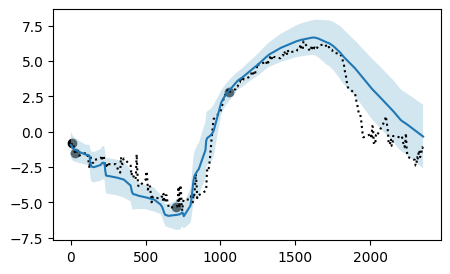

In [56]:
# knowledge_pre = ['The night will be bitterly cold with temperatures falling to -16.4°C, gradually rising to -13.4°C by early morning, and remarkably, the afternoon will see a significant temperature shift, hovering around freezing point at 0.3°C.']
knowledge_pre = ['The night will start off cold with temperatures falling to -5.3°C by early morning, but it will gradually warm up reaching 20°C in the late afternoon, before cooling down again to -2.0°C at midnight.']

model.training = False
knowledge = preprocess_knowledge(knowledge_pre, langmodel, tokenizer)
plot_predictive(model, batch, knowledge=knowledge, save=False, iter=None)

model.training = True
